# Modelo de Classificação

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import sklearn

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import h2o

## A. Preparação dos Dados e Análise Inicial

In [2]:
data = '../data/campaigns.csv'
df   = pd.read_csv(data, encoding="utf-8", sep=",")

In [3]:
df.columns = ['index', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y']

In [4]:
df.head()

,index,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### 1. Ditribuição da Classificação no Dataset

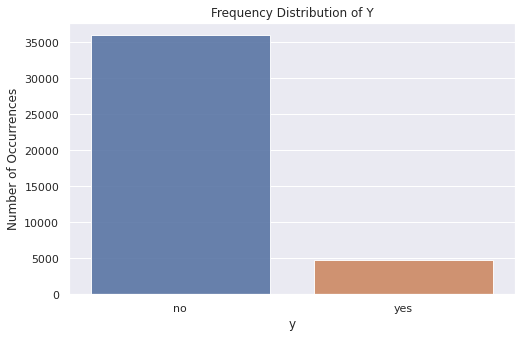

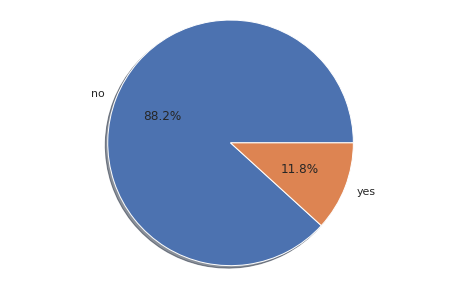

In [5]:
sns.set(rc={'figure.figsize':(8,5)})
y_count = df['y'].value_counts()
sns.set(style="darkgrid")
sns.barplot(y_count.index, y_count.values, alpha=0.9)
plt.title('Frequency Distribution of Y')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('y', fontsize=12)
plt.show()

labels = df['y'].astype('category').cat.categories.tolist()
counts = df['y'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [6]:
df.columns

Index(['index', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
cols_selected = ['age', 'balance', 'job_code', 'marital_code', 'education_code', 
                 'default_code', 'housing_code', 'loan_code',  'contact_code', 
                 'poutcome_code', 'y']

In [8]:
df_train = df.copy()

### 2. Transformaçãos na colunas

In [9]:
lb_make = LabelEncoder()

In [10]:
df_train['job_code'] = lb_make.fit_transform(df_train['job'])
df_train['marital_code'] = lb_make.fit_transform(df_train['marital'])
df_train['education_code'] = lb_make.fit_transform(df_train['education'])
df_train['default_code'] = lb_make.fit_transform(df_train['default'])
df_train['housing_code'] = lb_make.fit_transform(df_train['housing'])
df_train['loan_code'] = lb_make.fit_transform(df_train['loan'])
df_train['contact_code'] = lb_make.fit_transform(df_train['contact'])
df_train['poutcome_code'] = lb_make.fit_transform(df_train['poutcome'])
df_train['target'] = lb_make.fit_transform(df_train['y'])

In [11]:
df_train.columns

Index(['index', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y', 'job_code', 'marital_code',
       'education_code', 'default_code', 'housing_code', 'loan_code',
       'contact_code', 'poutcome_code', 'target'],
      dtype='object')

In [12]:
cols_selected = ['age', 'balance', 'job_code', 'marital_code', 'education_code', 
                 'default_code', 'housing_code', 'loan_code',  'contact_code', 
                 'poutcome_code', 'target']

In [13]:
df_train = df_train[cols_selected]

In [14]:
df_train.head()

,age,balance,job_code,marital_code,education_code,default_code,housing_code,loan_code,contact_code,poutcome_code,target
0,58,2143,4,1,2,0,1,0,2,3,0
1,44,29,9,2,1,0,1,0,2,3,0
2,33,2,2,1,1,0,1,1,2,3,0
3,47,1506,1,1,3,0,1,0,2,3,0
4,33,1,11,2,3,0,0,0,2,3,0


## B. Avaliando Modelos

#### Iremos usar 10% da Amostras para Testes

### 3.1 Gerando Modelo com H20 (AutoML)

In [15]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,12 hours 19 mins
H2O_cluster_timezone:,America/Fortaleza
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.6
H2O_cluster_version_age:,2 days
H2O_cluster_name:,H2O_from_python_mardoniofranca_jnrxlw
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.294 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [16]:
data = '../data/campaigns.csv'
df   = h2o.import_file(data)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [17]:
y = "y"
x = df.columns
x.remove(y)
x.remove("C1")

In [18]:
# split into train and testing sets
train, test = df.split_frame(ratios = [0.9], seed = 1234)

In [19]:
aml = H2OAutoML(max_models = 10, seed = 1)
aml.train(x = x, y = y, training_frame = train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [20]:
lb = aml.leaderboard

In [21]:
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20200702_214231,0.936843,0.213747,0.639591,0.165726,0.253338,0.0641801
StackedEnsemble_BestOfFamily_AutoML_20200702_214231,0.936288,0.21396,0.639221,0.152797,0.253384,0.0642035
GBM_3_AutoML_20200702_214231,0.935635,0.19908,0.63385,0.169813,0.250045,0.0625227
GBM_2_AutoML_20200702_214231,0.93557,0.199091,0.628483,0.160635,0.250128,0.062564
GBM_5_AutoML_20200702_214231,0.934866,0.197912,0.626401,0.176298,0.249931,0.0624653
XGBoost_3_AutoML_20200702_214231,0.934314,0.199441,0.62516,0.168227,0.250146,0.0625732
GBM_1_AutoML_20200702_214231,0.934271,0.200501,0.626327,0.181699,0.250569,0.0627848
GBM_4_AutoML_20200702_214231,0.933477,0.203544,0.618906,0.166247,0.253165,0.0640927
XGBoost_1_AutoML_20200702_214231,0.929979,0.207679,0.607574,0.174902,0.25575,0.0654079
DRF_1_AutoML_20200702_214231,0.928923,0.208778,0.614486,0.166637,0.252056,0.0635324


In [22]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
metalearner = h2o.get_model(se.metalearner()['name'])

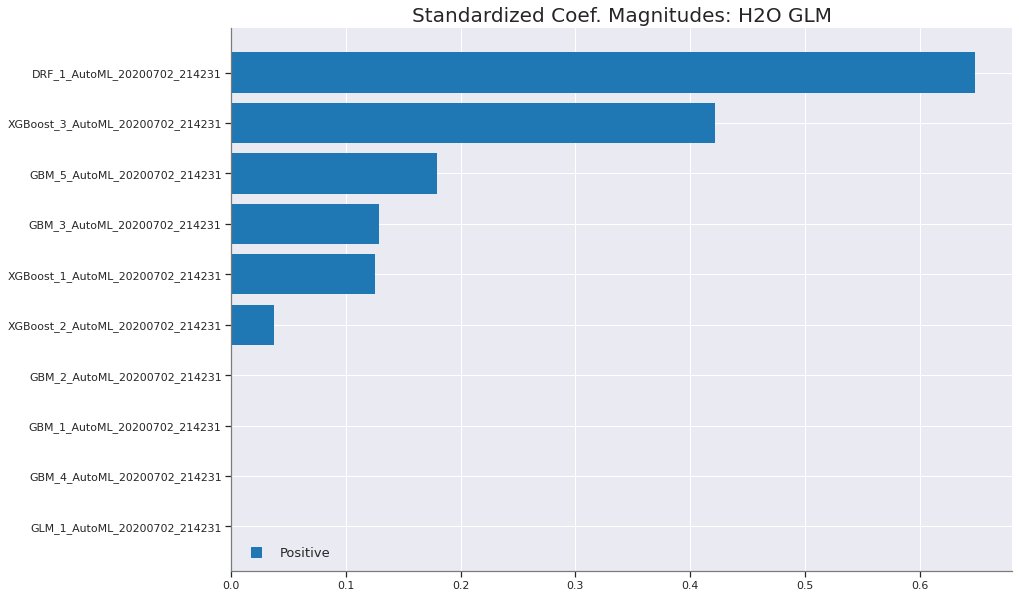

In [23]:
%matplotlib inline
metalearner.std_coef_plot()

In [24]:
aml.leader.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.29021184683101026: 


,,no,yes,Error,Rate
0,no,8679.0,164.0,0.0185,(164.0/8843.0)
1,yes,131.0,1078.0,0.1084,(131.0/1209.0)
2,Total,8810.0,1242.0,0.0293,(295.0/10052.0)


In [25]:
aml_leader_performance = aml.leader.model_performance(test)
print(aml_leader_performance)


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.06308031715201537
RMSE: 0.2511579525956034
LogLoss: 0.21078030388328556
Null degrees of freedom: 4122
Residual degrees of freedom: 4116
Null deviance: 2970.441008281681
Residual deviance: 1738.094385821573
AIC: 1752.094385821573
AUC: 0.9362308069062599
AUCPR: 0.64262398097346
Gini: 0.8724616138125199

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.18428089357308824: 


,,no,yes,Error,Rate
0,no,3366.0,276.0,0.0758,(276.0/3642.0)
1,yes,116.0,365.0,0.2412,(116.0/481.0)
2,Total,3482.0,641.0,0.0951,(392.0/4123.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.184281,0.650624,259.0
1,max f2,0.076865,0.744456,324.0
2,max f0point5,0.425973,0.628323,170.0
3,max accuracy,0.425973,0.913170,170.0
4,max precision,0.962073,1.000000,0.0
5,max recall,0.024379,1.000000,398.0
6,max specificity,0.962073,1.000000,0.0
7,max absolute_mcc,0.184281,0.605137,259.0
8,max min_per_class_accuracy,0.080570,0.866557,321.0
9,max mean_per_class_accuracy,0.076865,0.871889,324.0



Gains/Lift Table: Avg response rate: 11,67 %, avg score: 11,46 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010187,0.900130,7.347193,7.347193,0.857143,0.933109,0.857143,0.933109,0.074844,0.074844,634.719335,634.719335,0.073197
1,2,0.020131,0.853005,6.062928,6.712797,0.707317,0.876285,0.783133,0.905039,0.060291,0.135135,506.292784,571.279713,0.130193
2,3,0.030075,0.785102,5.853861,6.428794,0.682927,0.820214,0.750000,0.876992,0.058212,0.193347,485.386137,542.879418,0.184835
3,4,0.040019,0.732847,6.271994,6.389832,0.731707,0.754546,0.745455,0.846566,0.062370,0.255717,527.199432,538.983179,0.244185
4,5,0.050206,0.681984,4.489951,6.004349,0.523810,0.709251,0.700483,0.818705,0.045738,0.301455,348.995149,500.434883,0.284432
5,6,0.100170,0.404227,5.076459,5.541527,0.592233,0.539028,0.646489,0.679205,0.253638,0.555094,407.645883,454.152719,0.515006
6,7,0.150133,0.197976,3.661708,4.915933,0.427184,0.291610,0.573506,0.550215,0.182952,0.738046,266.170801,391.593308,0.665558
7,8,0.200097,0.099168,2.080516,4.207938,0.242718,0.142280,0.490909,0.448355,0.103950,0.841996,108.051592,320.793801,0.726675
8,9,0.300024,0.041225,1.019453,3.145969,0.118932,0.062328,0.367017,0.319783,0.101871,0.943867,1.945280,214.596880,0.728875
9,10,0.399951,0.030156,0.291272,2.432727,0.033981,0.034343,0.283808,0.248467,0.029106,0.972973,-70.872777,143.272745,0.648701


### 3.2 Gerando Modelo com PyCarret

In [26]:
from pycaret.classification import *

In [27]:
exp_classification = setup(data=df_train,
                           target='target',
                           remove_outliers=False,)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,8195
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(40690, 11)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [28]:
pycaret_xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8842,0.6878,0.1515,0.5000,0.2326,0.1889
1,0.8947,0.6949,0.2727,0.6000,0.3750,0.3262
2,0.8982,0.7047,0.1818,0.7500,0.2927,0.2592
3,0.8912,0.7798,0.2059,0.6364,0.3111,0.2684
4,0.8947,0.8224,0.1765,0.7500,0.2857,0.2517
5,0.8912,0.7340,0.1765,0.6667,0.2791,0.2412
6,0.8912,0.7830,0.1765,0.6667,0.2791,0.2412
7,0.8737,0.6951,0.1176,0.4000,0.1818,0.1349
8,0.9120,0.8088,0.3333,0.7857,0.4681,0.4285
9,0.9085,0.7692,0.2121,1.0000,0.3500,0.3224


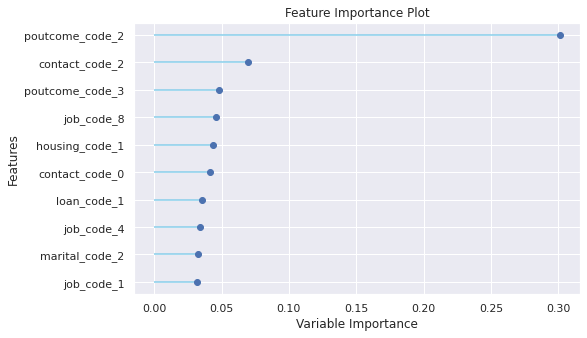

In [29]:
plot_model(pycaret_xgboost, plot = 'feature')

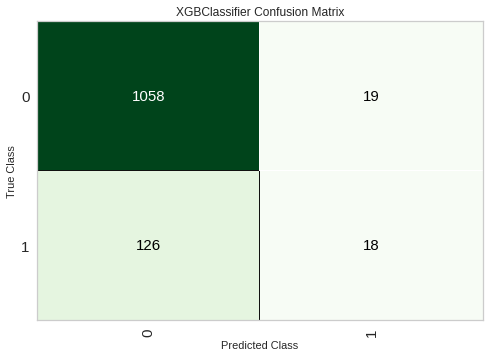

In [30]:
plot_model(pycaret_xgboost, plot = 'confusion_matrix')

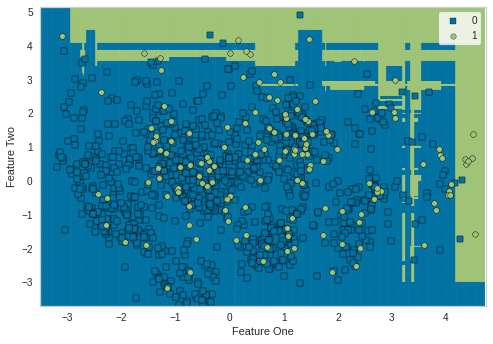

In [31]:
plot_model(pycaret_xgboost, plot = 'boundary')

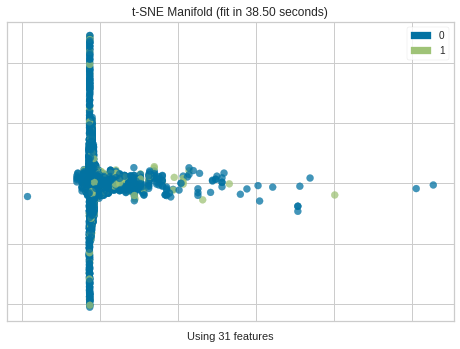

In [32]:
plot_model(pycaret_xgboost, plot = 'manifold')

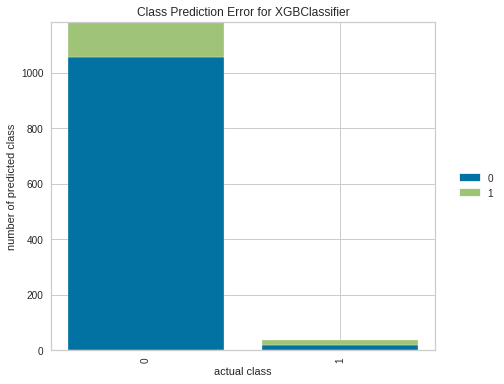

In [33]:
plot_model(pycaret_xgboost, plot = 'error')

## C. Resultados Modelo

### Melhor Modelo 

In [34]:
aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20200702_173021

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.02475924034096564
RMSE: 0.1573506922163536
LogLoss: 0.10187949779829418
Null degrees of freedom: 10051
Residual degrees of freedom: 10045
Null deviance: 7388.260846076202
Residual deviance: 2048.185423736906
AIC: 2062.185423736906
AUC: 0.9933800615404071
AUCPR: 0.9603595905420071
Gini: 0.9867601230808143

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.29021184683101026: 


,,no,yes,Error,Rate
0,no,8679.0,164.0,0.0185,(164.0/8843.0)
1,yes,131.0,1078.0,0.1084,(131.0/1209.0)
2,Total,8810.0,1242.0,0.0293,(295.0/10052.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.290212,0.879641,235.0
1,max f2,0.158503,0.903296,290.0
2,max f0point5,0.563014,0.922625,151.0
3,max accuracy,0.349290,0.971349,215.0
4,max precision,0.969206,1.000000,0.0
5,max recall,0.049985,1.000000,353.0
6,max specificity,0.969206,1.000000,0.0
7,max absolute_mcc,0.290212,0.863035,235.0
8,max min_per_class_accuracy,0.169445,0.953681,285.0
9,max mean_per_class_accuracy,0.117059,0.957471,308.0



Gains/Lift Table: Avg response rate: 12,03 %, avg score: 12,25 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010048,0.946709,8.314309,8.314309,1.000000,0.955829,1.000000,0.955829,0.083540,0.083540,731.430935,731.430935,0.083540
1,2,0.020096,0.924261,8.314309,8.314309,1.000000,0.935311,1.000000,0.945570,0.083540,0.167080,731.430935,731.430935,0.167080
2,3,0.030044,0.897887,8.314309,8.314309,1.000000,0.911261,1.000000,0.934209,0.082713,0.249793,731.430935,731.430935,0.249793
3,4,0.040092,0.866795,8.314309,8.314309,1.000000,0.881191,1.000000,0.920922,0.083540,0.333333,731.430935,731.430935,0.333333
4,5,0.050040,0.825896,8.314309,8.314309,1.000000,0.846237,1.000000,0.906074,0.082713,0.416046,731.430935,731.430935,0.416046
5,6,0.100080,0.460362,7.471308,7.892809,0.898608,0.666605,0.949304,0.786340,0.373863,0.789909,647.130780,689.280857,0.784142
6,7,0.150020,0.182239,3.163413,6.318434,0.380478,0.294965,0.759947,0.622765,0.157982,0.947891,216.341252,531.843403,0.906954
7,8,0.200060,0.075198,0.925649,4.969567,0.111332,0.118549,0.597713,0.496648,0.046319,0.994210,-7.435125,396.956730,0.902725
8,9,0.300040,0.035465,0.057911,3.332891,0.006965,0.049231,0.400862,0.347559,0.005790,1.000000,-94.208939,233.289125,0.795658
9,10,0.400020,0.028457,0.000000,2.499876,0.000000,0.031157,0.300671,0.268478,0.000000,1.000000,-100.000000,149.987565,0.682008




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.06418011150457971
RMSE: 0.25333793933120186
LogLoss: 0.21374679272654243
Null degrees of freedom: 36566
Residual degrees of freedom: 36559
Null deviance: 26507.901365107842
Residual deviance: 15632.157939262954
AIC: 15648.157939262954
AUC: 0.9368426137875424
AUCPR: 0.6395906054254266
Gini: 0.8736852275750848

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1834877010181044: 


,,no,yes,Error,Rate
0,no,29667.0,2594.0,0.0804,(2594.0/32261.0)
1,yes,1081.0,3225.0,0.251,(1081.0/4306.0)
2,Total,30748.0,5819.0,0.1005,(3675.0/36567.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.183488,0.637037,279.0
1,max f2,0.072199,0.744530,337.0
2,max f0point5,0.393745,0.616178,196.0
3,max accuracy,0.393745,0.909755,196.0
4,max precision,0.967663,1.000000,0.0
5,max recall,0.024071,1.000000,399.0
6,max specificity,0.967663,1.000000,0.0
7,max absolute_mcc,0.123838,0.590654,307.0
8,max min_per_class_accuracy,0.078490,0.868820,333.0
9,max mean_per_class_accuracy,0.050206,0.874841,354.0



Gains/Lift Table: Avg response rate: 11,78 %, avg score: 11,77 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010009,0.912413,7.123158,7.123158,0.838798,0.934409,0.838798,0.934409,0.071296,0.071296,612.315831,612.315831,0.069467
1,2,0.020018,0.866496,6.496692,6.809925,0.765027,0.890817,0.801913,0.912613,0.065026,0.136321,549.669162,580.992496,0.131827
2,3,0.030000,0.811535,5.956106,6.525837,0.701370,0.839308,0.768459,0.888223,0.059452,0.195773,495.610585,552.583747,0.187900
3,4,0.040009,0.760824,6.102250,6.419868,0.718579,0.785213,0.755981,0.862453,0.061078,0.256851,510.224962,541.986813,0.245785
4,5,0.050018,0.703798,5.359771,6.207733,0.631148,0.733454,0.731001,0.836639,0.053646,0.310497,435.977058,520.773270,0.295246
5,6,0.100008,0.427845,4.608407,5.408288,0.542670,0.565163,0.636861,0.700938,0.230376,0.540873,360.840657,440.828830,0.499709
6,7,0.149999,0.209990,3.595672,4.804193,0.423414,0.310995,0.565725,0.570981,0.179749,0.720622,259.567206,380.419304,0.646787
7,8,0.200016,0.097468,2.423662,4.208898,0.285402,0.145755,0.495625,0.464645,0.121226,0.841849,142.366228,320.889761,0.727500
8,9,0.299997,0.040641,1.073127,3.163831,0.126368,0.060421,0.372562,0.329929,0.107292,0.949141,7.312693,216.383129,0.735787
9,10,0.400005,0.030308,0.318135,2.452358,0.037462,0.034346,0.288781,0.256028,0.031816,0.980957,-68.186539,145.235848,0.658493


### Características dos Dados Importante para o Modelo

In [35]:
h2o.get_model(lb[2,"model_id"]).varimp(use_pandas=True)

,variable,relative_importance,scaled_importance,percentage
0,duration,3783.329102,1.000000,0.353213
1,month,1805.965820,0.477348,0.168606
2,poutcome,1143.783203,0.302322,0.106784
3,job,786.543213,0.207897,0.073432
4,day,668.874451,0.176795,0.062446
5,age,605.219604,0.159970,0.056504
6,pdays,556.192932,0.147012,0.051926
7,contact,273.578949,0.072312,0.025541
8,housing,265.698334,0.070229,0.024806
9,balance,253.979996,0.067131,0.023712


### Gerando CSV de Teste de Acordo com o Desafio

In [33]:
data = '../data/campaigns.csv'
df   = pd.read_csv(data, encoding="utf-8", sep=",")
df_test = df.sample(frac=0.1, replace=True, random_state=1)

In [40]:
df_test = df_test[['age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome']]

In [41]:
len(df_test)

4069

In [42]:
hf_test = h2o.H2OFrame(df_test)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [43]:
hf_test.types

{'age': 'int',
 'job': 'enum',
 'marital': 'enum',
 'education': 'enum',
 'default': 'enum',
 'balance': 'int',
 'housing': 'enum',
 'loan': 'enum',
 'contact': 'enum',
 'day': 'int',
 'month': 'enum',
 'duration': 'int',
 'campaign': 'int',
 'pdays': 'int',
 'previous': 'int',
 'poutcome': 'enum'}

In [58]:
pred = aml.leader.predict(hf_test)

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [59]:
p = pred.as_data_frame()

In [60]:
p.head()

,predict,no,yes
0,no,0.973641,0.026359
1,yes,0.595562,0.404438
2,no,0.975761,0.024239
3,no,0.871889,0.128111
4,no,0.975516,0.024484


In [62]:
df_test = df_test.reset_index()
p = p.reset_index()

In [63]:
result = pd.concat([df_test, p], axis=1)

In [64]:
result.head()

,index,age,job,marital,education,default,balance,housing,loan,contact,...,duration,campaign,pdays,previous,poutcome,predict,index,predict,no,yes
0,33003,28,admin.,single,secondary,no,242,yes,yes,cellular,...,256,1,349,1,failure,NaN,0,no,0.973641,0.026359
1,12172,43,technician,married,secondary,no,-754,yes,yes,cellular,...,727,3,-1,0,unknown,NaN,1,yes,0.595562,0.404438
2,5192,39,management,married,tertiary,no,-606,yes,no,unknown,...,142,1,-1,0,unknown,NaN,2,no,0.975761,0.024239
3,32511,49,blue-collar,married,primary,no,3652,yes,yes,cellular,...,568,1,285,2,other,NaN,3,no,0.871889,0.128111
4,7813,58,management,divorced,tertiary,no,50,yes,no,unknown,...,109,4,-1,0,unknown,NaN,4,no,0.975516,0.024484


In [65]:
len(result)

4069

In [66]:
result.to_csv('../data/result_campaigns.csv')

No resultado, temos a coluna predict (yes ou no) e acrescentando as probabilidades de ocorrência (no/yes)

### comentário final: 
1.  Os resultados via h2o são suficientes para alcançar uma perfomance inicial aceitável 
2.  O tempo de ligação (duration) é uma variável importante para a definição de aceitação pelo cliente, como observado no modelos (h2o)

#### comentário de resultado preliminar:
1.  A investigação no PyCarret foi preliminar. É possível aplicar o automl no PyCarret e analisar os resultados
2.  O modelo poderá ser executado, realizando a remoção de outliers
3.  O balanceamento das classe (y: target) é uma análise que poderá ser analisada

#### cronograma de execução:
1.  Esta análise teve custo em tempo de 2 turnos (6 horas)

### referências

#### bank-telemarketing

https://towardsdatascience.com/machine-learning-case-study-a-data-driven-approach-to-predict-the-success-of-bank-telemarketing-20e37d46c31c

https://www.sciencedirect.com/science/article/pii/S016792361400061X

http://media.salford-systems.com/video/tutorial/2015/targeted_marketing.pdf


#### categorical-data
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

https://towardsdatascience.com/encoding-categorical-features-21a2651a065c


#### feature-exploration-and-engineering
https://towardsdatascience.com/data-preprocessing-for-non-techies-feature-exploration-and-engineering-f1081438a5de


#### ferramentas:
h20, pycarret, scklearn


